# Thesis Outcomes

In this notebook I will compare the result I got from all the algorithms I implemented. 

I will start by comparing both packing methods with each other. Then i will be comparing the Mean, followed by the Inner Product, and finish with the Variance.

For all the algorithms I am working with vector of size n = 8192 which are always filled with exactly 8192 values which can be 1, 2 or 3.

## Setup

In [2]:
# Imports
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Function to extract files from folder
def get_files(filepath):
    all_files = []
    for root, dirs, files in os.walk(filepath):
            files = glob.glob(os.path.join(root, '*.csv'))
            for f in files:
                    all_files.append(os.path.abspath(f))
    return all_files

In [4]:
# Get file names
outcomes_CSV = get_files("../timeCSVs")

# Import csv as a Dataframe
print(outcomes_CSV[0])
inner_Product_DF = pd.read_csv(outcomes_CSV[0])
print(outcomes_CSV[1])
mean_DF = pd.read_csv(outcomes_CSV[1])
print(outcomes_CSV[2])
variance_DF = pd.read_csv(outcomes_CSV[2])

c:\Users\berna\Desktop\Personal\FEUP\Thesis\Project\HE_Optimization\Outcomes\timeCSVs\innerProduct.csv
c:\Users\berna\Desktop\Personal\FEUP\Thesis\Project\HE_Optimization\Outcomes\timeCSVs\mean.csv
c:\Users\berna\Desktop\Personal\FEUP\Thesis\Project\HE_Optimization\Outcomes\timeCSVs\variance.csv


In [5]:
# Auxiliary Functions

def compare_two_types_by_percentage(column1, column2, df):
    return ((df.loc[df['Type'] == column2]['Average'].values[0] - df.loc[df['Type'] == column1]['Average'].values[0] )/ df.loc[df['Type'] == column2]['Average'].values[0]) * 100

def create_df_for_type(type, setup_averages, encryption_averages, homomorphic_averages):
    df = pd.DataFrame(columns=['Time'], index=['Setup', 'Encryption', 'Homomorphic'])

    df.loc['Setup'] = float(format(setup_averages[setup_averages['Type'] == type]['Average'].values[0], ".2f"))
    df.loc['Encryption'] = float(format(encryption_averages[encryption_averages['Type'] == type]['Average'].values[0], ".2f"))
    df.loc['Homomorphic'] = float(format(homomorphic_averages[homomorphic_averages['Type'] == type]['Average'].values[0], ".2f"))

    return df

## Variance

For the variance I have 2 types of implementation.

The first algorithm is an expansion of the original formula of the variance.

The second comes from a paper.

In [6]:
variance_DF['type'].unique()

array(['sum-squares-slot', 'inner-product-slot', 'half-size-inner-coef'],
      dtype=object)

In [15]:
### Create DF for each type of implementation
sum_squares_slot_DF = variance_DF[variance_DF['type'] == "sum-squares-slot"]
inner_product_slot_DF = variance_DF[variance_DF['type'] == "inner-product-slot"]
half_sized_inner_coef_DF = variance_DF[variance_DF['type'] == "half-size-inner-coef"]

implementation_dfs = {'sum_squares_slot': sum_squares_slot_DF,'inner_product_slot': inner_product_slot_DF, 'half_sized_inner_coef': half_sized_inner_coef_DF}

### Total Time Comparison

In [16]:
total_time_averages = pd.DataFrame({'Type': pd.Series(dtype='str'),
                                    'Average': pd.Series(dtype='float')})

for name, df in implementation_dfs.items():
    total_time_averages.loc[len(total_time_averages)] = {'Type': name, 'Average': df[' total'].mean()}

In [17]:
total_time_averages

,Type,Average
0,sum_squares_slot,478.477
1,inner_product_slot,496.619
2,half_sized_inner_coef,300.630


[Text(0, 0, '478.477'), Text(0, 0, '496.619'), Text(0, 0, '300.63')]

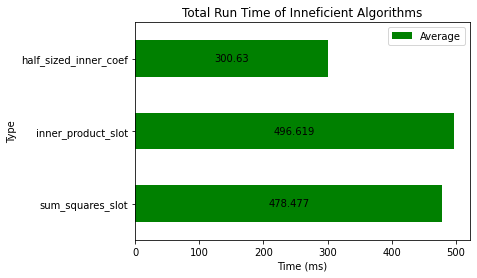

In [18]:
ax = total_time_averages.plot.barh(x='Type', ylabel='Time (ms)', color='green', title='Total Run Time of Inneficient Algorithms')
ax.set_xlabel('Time (ms)')
ax.bar_label(ax.containers[0], label_type='center')


In [28]:
# Compare both slot implementation
sum_squares_slot_vs_inner_prod_slot = format(compare_two_types_by_percentage("sum_squares_slot", "inner_product_slot", total_time_averages),
                             ".2f")

# Compare Coef vs Inner produc slot
coef_vs_inner_product_slot = format(compare_two_types_by_percentage("half_sized_inner_coef", "inner_product_slot", total_time_averages),
                               ".2f")

# ompare Coef vs Sum square slot
coef_vs_sum_square_slot = format(compare_two_types_by_percentage("half_sized_inner_coef", "sum_squares_slot", total_time_averages),
                               ".2f")

### Time per phase

I divided the algorithms in 5 phases: setup, encryption, homomorphic operations, decryption, plaintext operations.

The Setup Time includes the time it takes to generate all the parameters needed, generate the rotation keys needed, and the time it takes to pre process the values.

The Encryption is the time it takes to encrypt all the needed ciphertexts.

The Homomorphic Operation is the time it takes to execute all the homomorphic operations needed.

The Decryption is the time it takes to decrypt all the ciphertexts. Since we end up only decrypting one ciphertext, I don't use time for comparison.

The Plaintext Operation is the time it takes to execute all the operations over plaintexts. This is also not gonna be used because i would only do, at most, 1 plaintext operation and since it is plaintext it is the always the same value (it is not influenced by homomorphic scheme or packing type)

In [20]:
### Create a DataFrame for each phase with the average of each type of algorithm

# Setup
setup_averages = pd.DataFrame({'Type': pd.Series(dtype='str'),
                                    'Average': pd.Series(dtype='float')})

for name, df in implementation_dfs.items():
    setup_averages.loc[len(setup_averages)] = {'Type': name, 'Average': df[' setup'].mean()}

# Encryption
encryption_averages = pd.DataFrame({'Type': pd.Series(dtype='str'),
                                    'Average': pd.Series(dtype='float')})

for name, df in implementation_dfs.items():
    encryption_averages.loc[len(encryption_averages)] = {'Type': name, 'Average': df[' encryption'].mean()}

# Homomorphic
homomorphic_averages = pd.DataFrame({'Type': pd.Series(dtype='str'),
                                    'Average': pd.Series(dtype='float')})

for name, df in implementation_dfs.items():
    homomorphic_averages.loc[len(homomorphic_averages)] = {'Type': name, 'Average': df[' homomorphic'].mean()}

In [25]:
homomorphic_averages

,Type,Average
0,sum_squares_slot,164.293
1,inner_product_slot,182.141
2,half_sized_inner_coef,98.944


In [29]:
# Setup Operations Comparison
# Compare both slot implementation
setup_sum_squares_slot_vs_inner_prod_slot = format(compare_two_types_by_percentage("sum_squares_slot", "inner_product_slot", setup_averages),
                             ".2f")

# Compare Coef vs Inner produc slot
setup_coef_vs_inner_product_slot = format(compare_two_types_by_percentage("half_sized_inner_coef", "inner_product_slot", setup_averages),
                               ".2f")

# Compare Coef vs Sum square slot
setup_coef_vs_sum_square_slot = format(compare_two_types_by_percentage("half_sized_inner_coef", "sum_squares_slot", setup_averages),
                               ".2f")

# Encryption Operations Comparison
# Compare both slot implementation
encryption_sum_squares_slot_vs_inner_prod_slot = format(compare_two_types_by_percentage("sum_squares_slot", "inner_product_slot", encryption_averages),
                             ".2f")

# Compare Coef vs Inner produc slot
encryption_coef_vs_inner_product_slot = format(compare_two_types_by_percentage("inner_product_slot", "half_sized_inner_coef", encryption_averages),
                               ".2f")

# Compare Coef vs Sum square slot
encryption_coef_vs_sum_square_slot = format(compare_two_types_by_percentage("sum_squares_slot", "half_sized_inner_coef", encryption_averages),
                               ".2f")

# Homomorphic Operations Comparison
# Compare both slot implementation
homomorphic_sum_squares_slot_vs_inner_prod_slot = format(compare_two_types_by_percentage("sum_squares_slot", "inner_product_slot", homomorphic_averages),
                             ".2f")

# Compare Coef vs Inner produc slot
homomorphic_coef_vs_inner_product_slot = format(compare_two_types_by_percentage("half_sized_inner_coef", "inner_product_slot", homomorphic_averages),
                               ".2f")

# Compare Coef vs Sum square slot
homomorphic_coef_vs_sum_square_slot = format(compare_two_types_by_percentage("half_sized_inner_coef", "sum_squares_slot", homomorphic_averages),
                               ".2f")


[Text(50, 0, '164.293'), Text(50, 0, '182.141'), Text(50, 0, '98.944')]

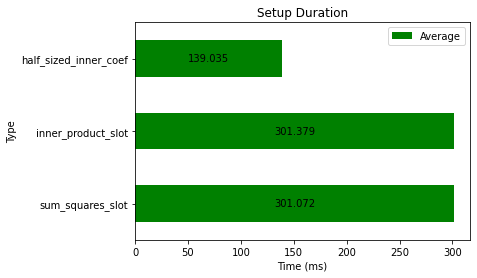

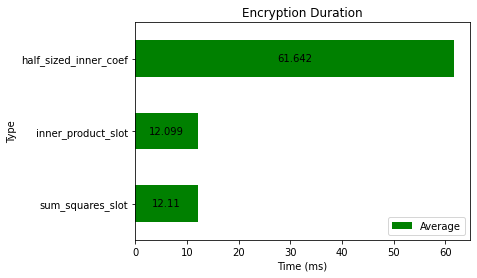

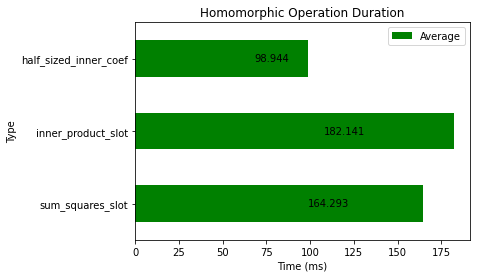

In [26]:
### Plot a graph for each phase

# Setup
ax = setup_averages.plot.barh(x='Type', color='green', title='Setup Duration')
ax.set_xlabel('Time (ms)')
ax.bar_label(ax.containers[0], label_type='center')

# Encryption
ax = encryption_averages.plot.barh(x='Type', color='green', title='Encryption Duration')
ax.set_xlabel('Time (ms)')
ax.bar_label(ax.containers[0], label_type='center')

# Homomorphic
# Needs two graphs because the values ara in a huge range
ax = homomorphic_averages.plot.barh(x='Type', ylabel='Time (ms)', color='green', title='Homomorphic Operation Duration')
ax.set_xlabel('Time (ms)')
ax.bar_label(ax.containers[0], label_type='center', padding=50)

In [30]:
print("Total Time:")
print("Sum Squares Slot vs Inner Product Slot: " + str(sum_squares_slot_vs_inner_prod_slot) + "%")
print("Half Size Coef vs Inner Product Slot: " + str(coef_vs_inner_product_slot) + "%")
print("Half Size Coef vs Sum Squares Slot: " + str(coef_vs_sum_square_slot) + "%")

print("\nSetup Operations:")
print("Sum Squares Slot vs Inner Product Slot: " + str(setup_sum_squares_slot_vs_inner_prod_slot) + "%")
print("Half Size Coef vs Inner Product Slot: " + str(setup_coef_vs_inner_product_slot) + "%")
print("Half Size Coef vs Sum Squares Slot: " + str(setup_coef_vs_sum_square_slot) + "%")

print("\nEncrypt Operations:")
print("Sum Squares Slot vs Inner Product Slot: " + str(encryption_sum_squares_slot_vs_inner_prod_slot) + "%")
print("Half Size Coef vs Inner Product Slot: " + str(encryption_coef_vs_inner_product_slot) + "%")
print("Half Size Coef vs Sum Squares Slot: " + str(encryption_coef_vs_sum_square_slot) + "%")

print("\nHomomorphic Operations:")
print("Sum Squares Slot vs Inner Product Slot: " + str(homomorphic_sum_squares_slot_vs_inner_prod_slot) + "%")
print("Half Size Coef vs Inner Product Slot: " + str(homomorphic_coef_vs_inner_product_slot) + "%")
print("Half Size Coef vs Sum Squares Slot: " + str(homomorphic_coef_vs_sum_square_slot) + "%")

Total Time:
Sum Squares Slot vs Inner Product Slot: 3.65%
Half Size Coef vs Inner Product Slot: 39.46%
Half Size Coef vs Sum Squares Slot: 37.17%

Setup Operations:
Sum Squares Slot vs Inner Product Slot: 0.10%
Half Size Coef vs Inner Product Slot: 53.87%
Half Size Coef vs Sum Squares Slot: 53.82%

Encrypt Operations:
Sum Squares Slot vs Inner Product Slot: -0.09%
Half Size Coef vs Inner Product Slot: -409.48%
Half Size Coef vs Sum Squares Slot: -409.02%

Homomorphic Operations:
Sum Squares Slot vs Inner Product Slot: 9.80%
Half Size Coef vs Inner Product Slot: 45.68%
Half Size Coef vs Sum Squares Slot: 39.78%


### Conclusion

As expected the simple implementation is the worse in terms of time perfomance. Although homomorphic operations are very fast, the fact that we have to encrypt n ciphertexts makes it impratical for every application.

The rotation implementation sees an improvement but it continues to be too slow to be used in real applications. Coeffcient packing has the disadvantage that we need to create n plaintexts (one for each rotation) and the Slot packing has the disadvantage that we have to do 2*n operations, which are very time consuming.
Both the simple implementation and the rotation implementation (without optimization) are faster when using slot packing.

The optimization implemented consisted of reducing the rotation needed from n to log2(n). This gave an improvement to both the coefficient and the slot packing implementation.
As expected, the time for the homomorphic operations decreased drastically. In the coefficient implementation we saw a improvement of 99,85% and in the slot packing implementation we saw an improvement of 99,84%. ´
The drawback appeared only in the slot implementation, where the setup time was, almost, 5 times slower. This is due to the fact that in the normal implementation we only had to generate 1 evaluation key while for the optimization we needed log2(n) keys. Even with this drawback, the optimization gives an enormous improvement.

This optimization makes it worth it to use coefficient packing since it gives an improvement of 83,53% in terms of the times it takes to do operations. This translates to the coefficient packing being, overall, 58,63% faster than the slot counter part.

In terms of time perfomance the best algorithm is the one that uses coefficient packing with pre-processing before starting the operations. 
This is what was expected since this cuts the homomorphic operation from 2 * log2(n) to 1. 
The main drawback is the need to pre processed all the numbers before encryption but, as we can see by the Setup graph, it is still 79,72% faster than generating the rotation evaluation keys and 54,27% faster than generating all the plaintexts needed to do the coefficient rotations. 
The other drawback is the need to generate one more plaintext for the multiplication.
All this drawback allow us to only do one homomorphic operation that translates into this implementation being 196x faster, in terms of homomorphic operations duration, than the optimized coefficient implementation and 1193x faster than optimized slot implementation.
In terms of overall perfomance, it is 52,12% faster than the optimized coefficient implementation and 80,19% faster than the optimized slot implementation.
